In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

In [20]:
test_df = pd.read_csv('data_processed/Ba_Leng/2019_Ba_Leng_Rainfall.csv')
test_df

,Time,Rainfall,Year,Month
0,2019-01-01 00:00:00,0.0,2019,1
1,2019-01-01 01:00:00,0.0,2019,1
2,2019-01-01 02:00:00,0.0,2019,1
3,2019-01-01 03:00:00,0.0,2019,1
4,2019-01-01 04:00:00,0.0,2019,1
...,...,...,...,...
8755,2019-12-31 19:00:00,0.0,2019,12
8756,2019-12-31 20:00:00,0.0,2019,12
8757,2019-12-31 21:00:00,0.0,2019,12
8758,2019-12-31 22:00:00,0.0,2019,12


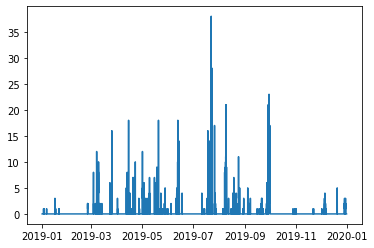

In [21]:
test_df['Time'] = pd.to_datetime(test_df['Time'])
X = test_df['Time']
Y = test_df['Rainfall']
plt.plot(X,Y)
plt.show()

In [22]:
test_df['Variation'] = test_df['Rainfall'] - test_df['Rainfall'].shift(1)
test_df

,Time,Rainfall,Year,Month,Variation
0,2019-01-01 00:00:00,0.0,2019,1,NaN
1,2019-01-01 01:00:00,0.0,2019,1,0.0
2,2019-01-01 02:00:00,0.0,2019,1,0.0
3,2019-01-01 03:00:00,0.0,2019,1,0.0
4,2019-01-01 04:00:00,0.0,2019,1,0.0
...,...,...,...,...,...
8755,2019-12-31 19:00:00,0.0,2019,12,0.0
8756,2019-12-31 20:00:00,0.0,2019,12,0.0
8757,2019-12-31 21:00:00,0.0,2019,12,0.0
8758,2019-12-31 22:00:00,0.0,2019,12,0.0


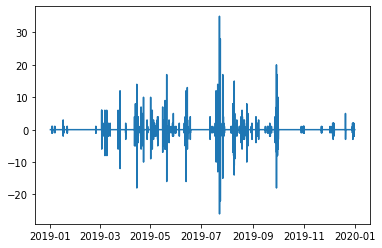

In [23]:
X = test_df['Time']
Y = test_df['Variation']
plt.plot(X,Y)
plt.show()

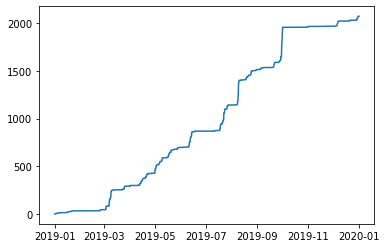

In [24]:
'''觀察雨量累積情況，以便從中挑選不同程度之降雨事件'''
X = test_df['Time']
Y = test_df['Rainfall']
Y_cum = np.cumsum(Y)
plt.plot(X, Y_cum)
plt.show()

[[ 0.  0.  0. ...  3. 38. 26.]
 [ 0.  0.  0. ... 38. 26.  0.]
 [ 0.  0.  0. ... 26.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0. 17. ...  0.  0.  0.]
 [ 0. 17. 17. ...  0.  0.  0.]]


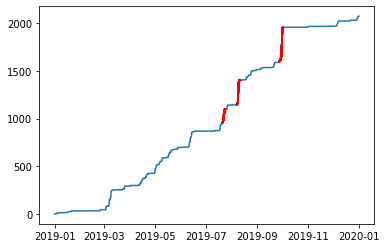

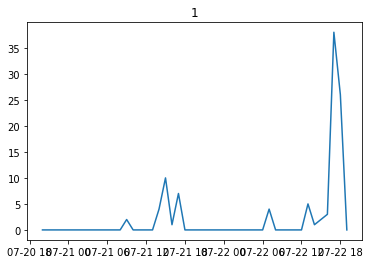

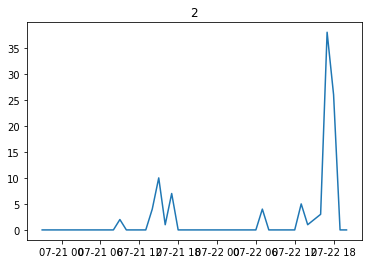

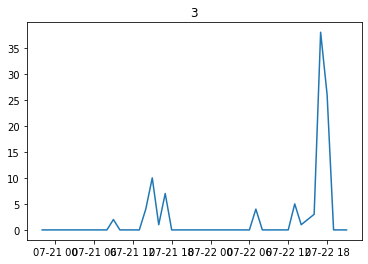

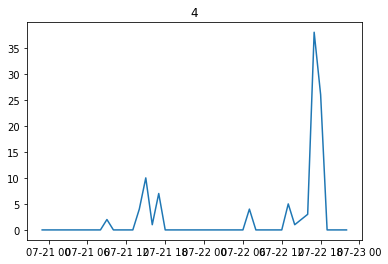

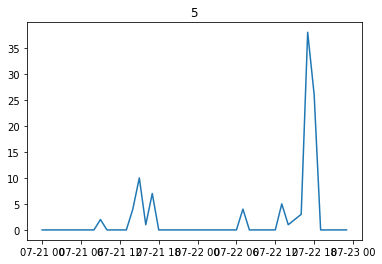

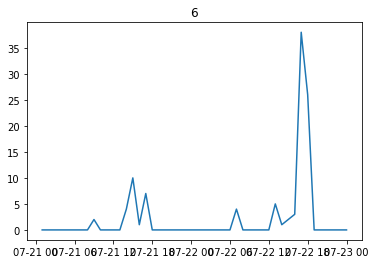

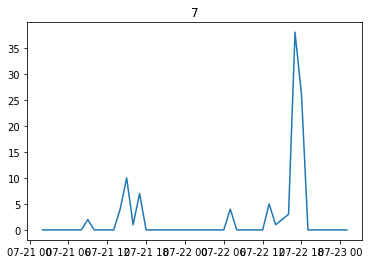

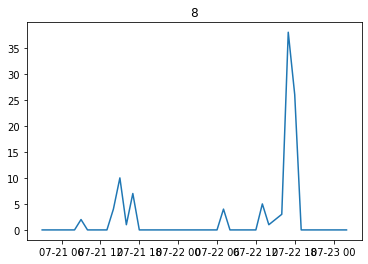

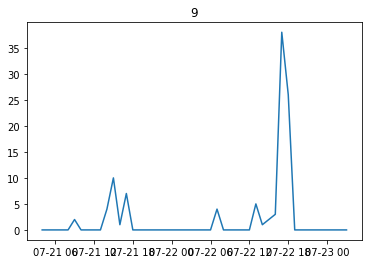

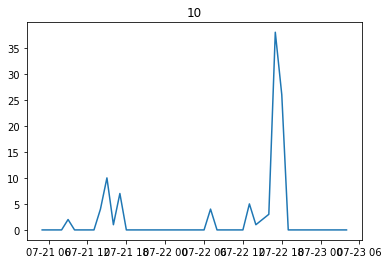

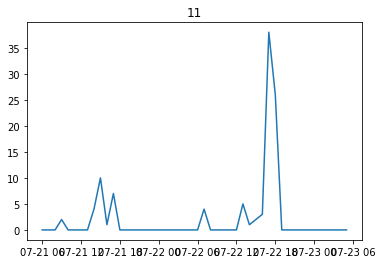

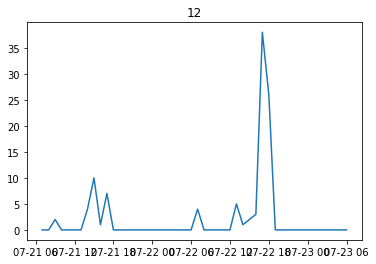

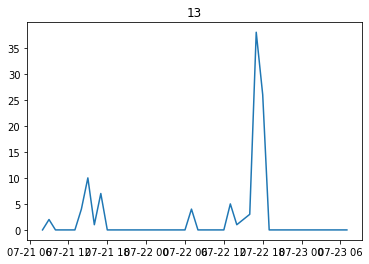

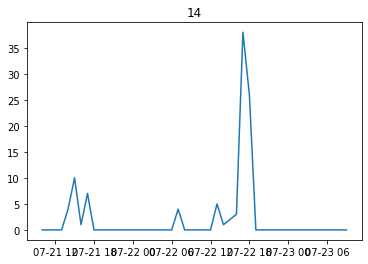

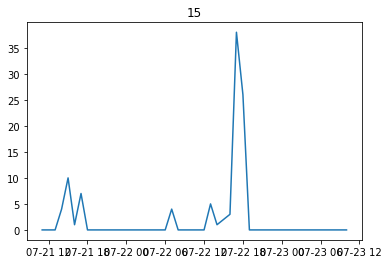

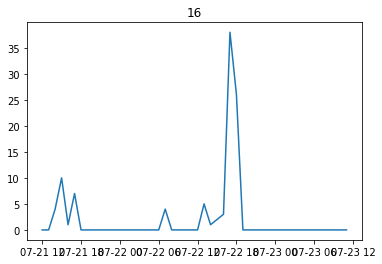

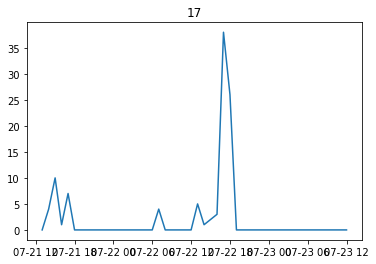

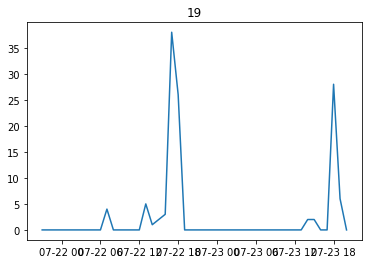

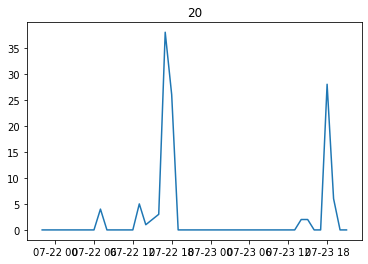

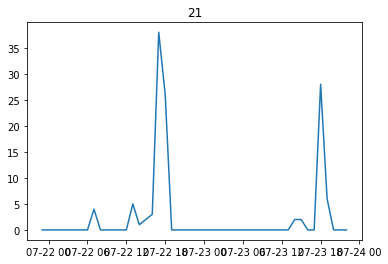

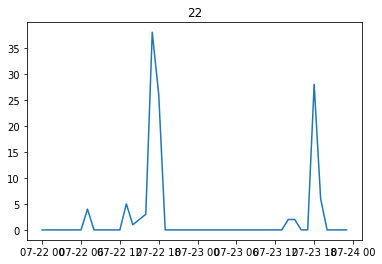

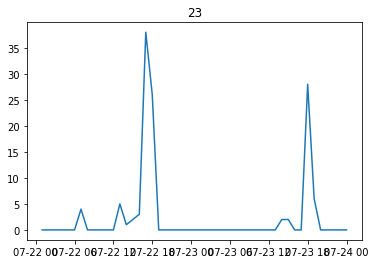

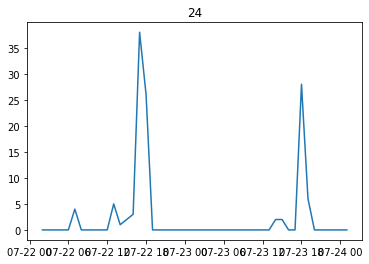

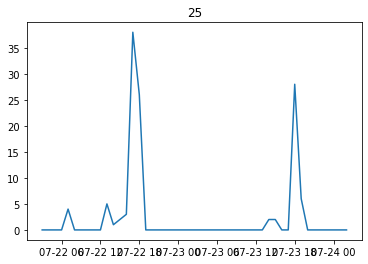

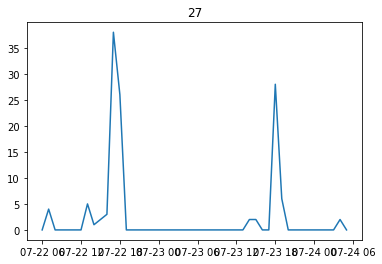

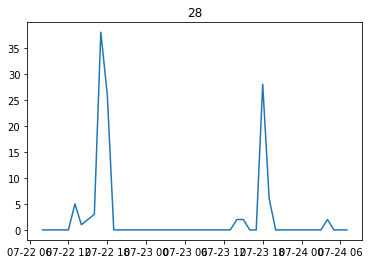

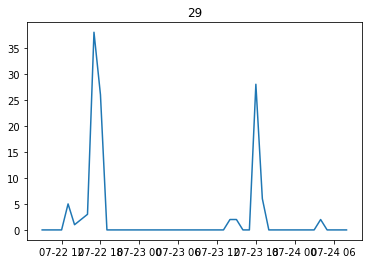

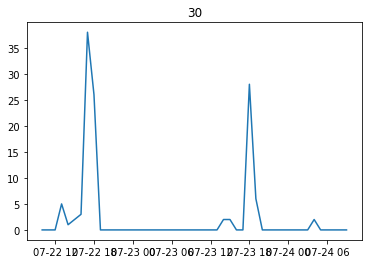

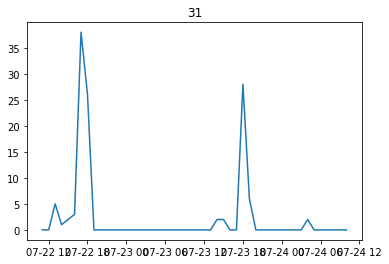

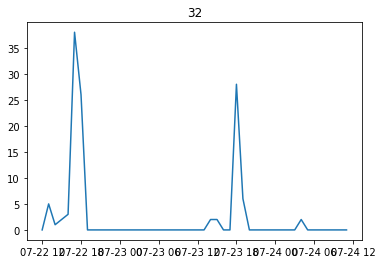

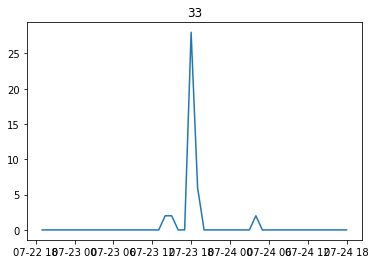

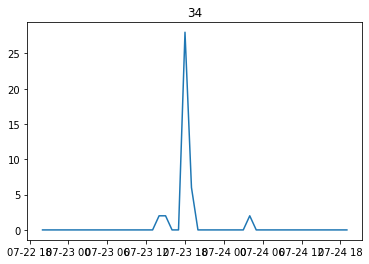

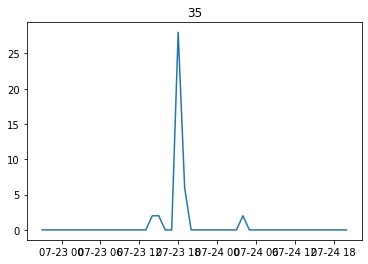

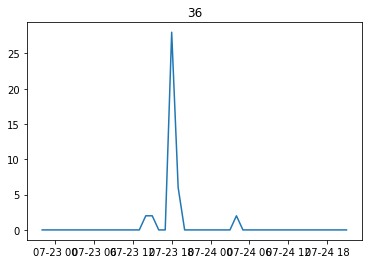

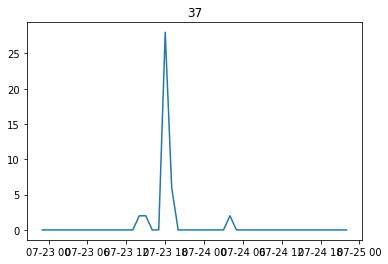

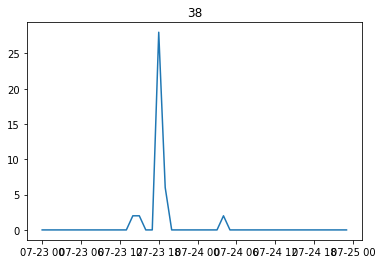

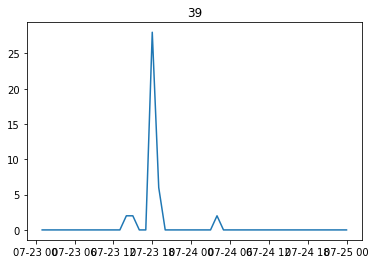

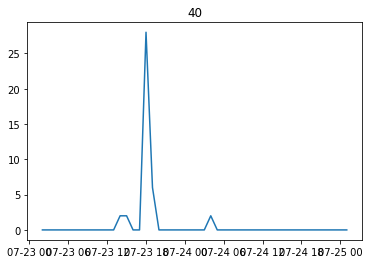

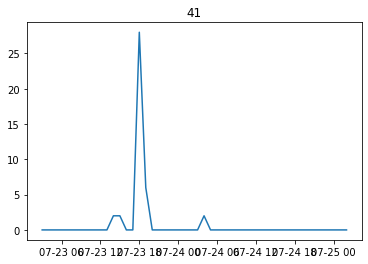

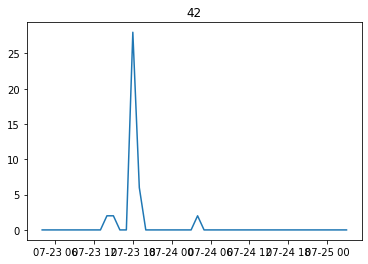

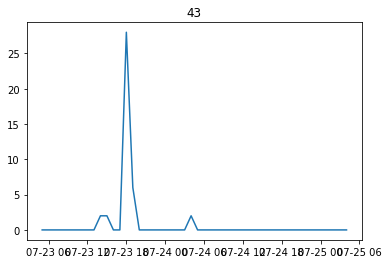

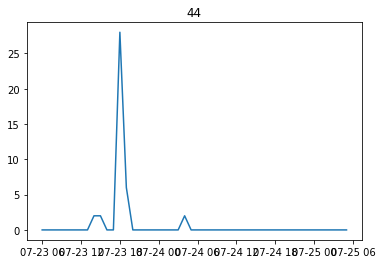

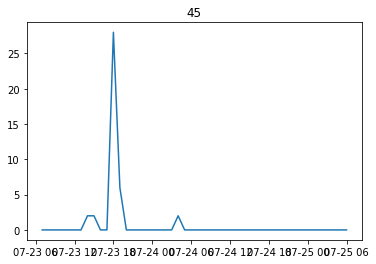

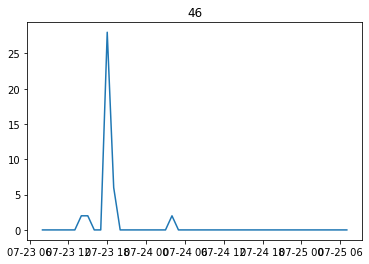

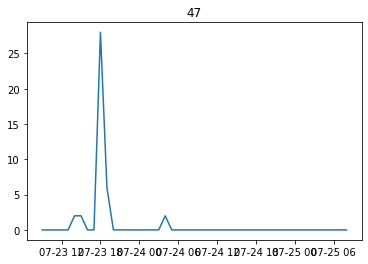

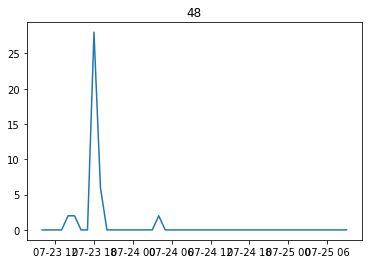

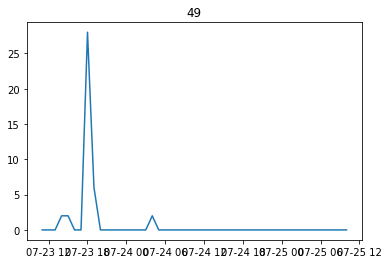

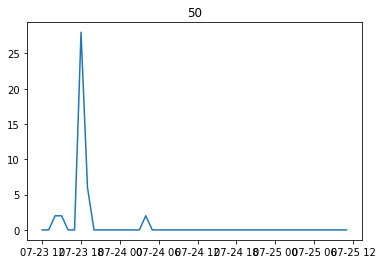

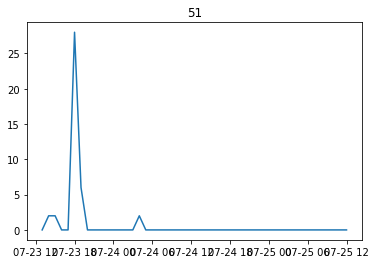

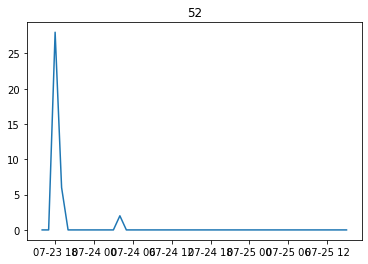

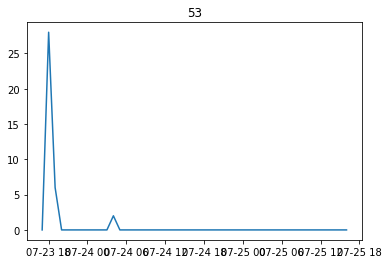

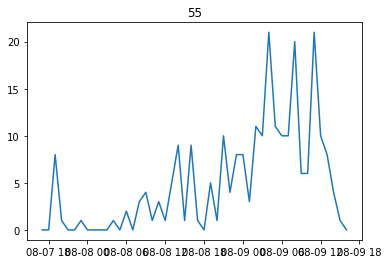

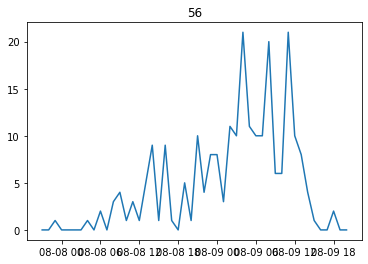

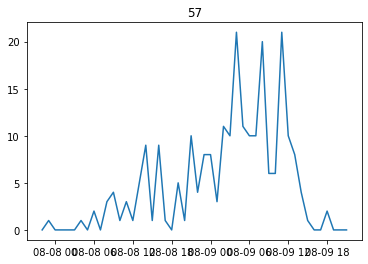

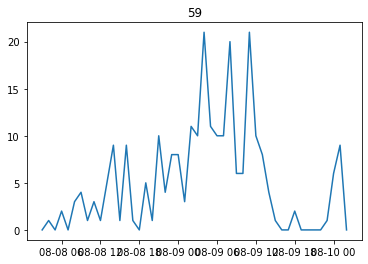

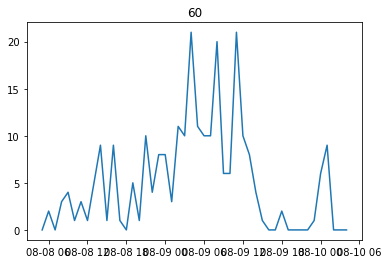

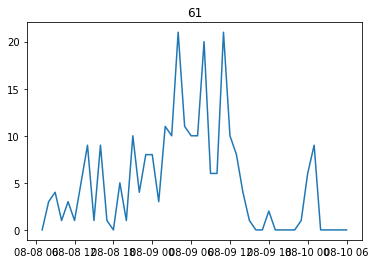

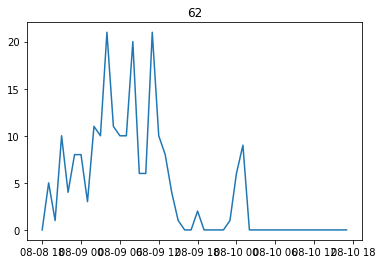

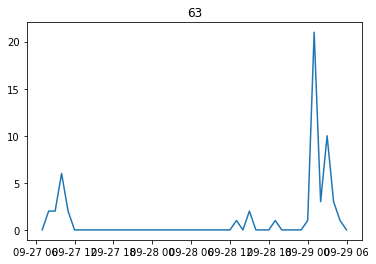

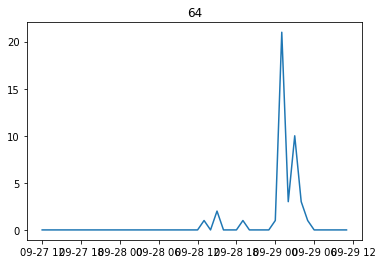

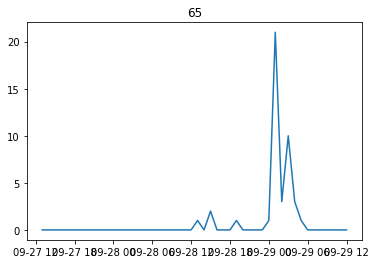

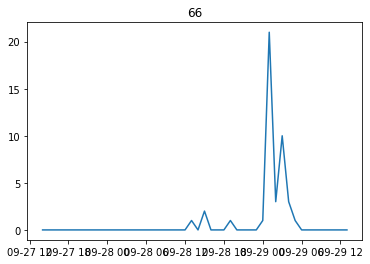

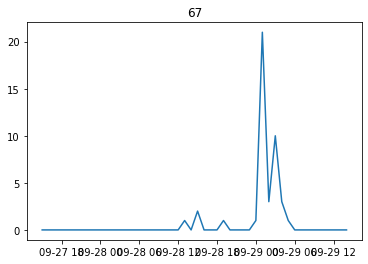

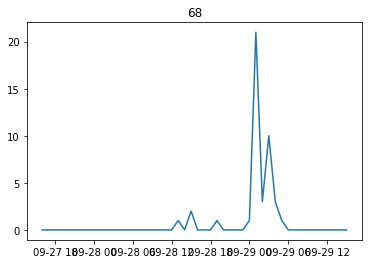

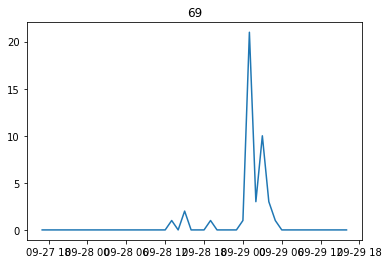

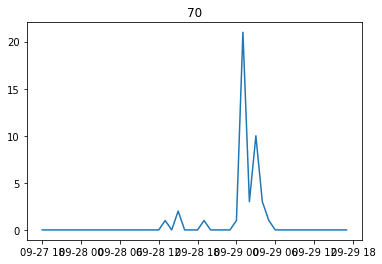

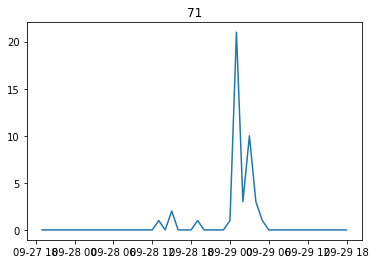

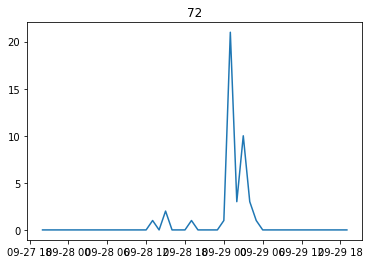

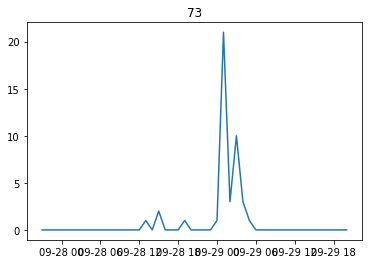

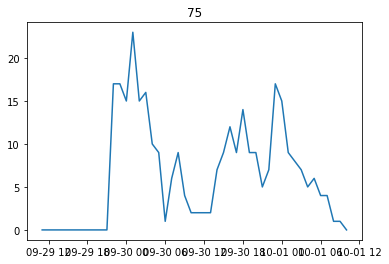

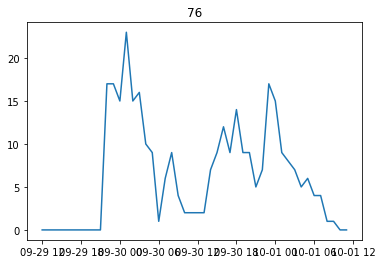

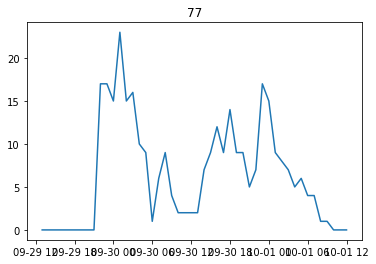

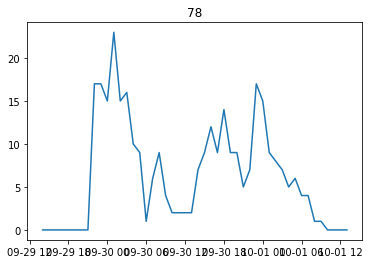

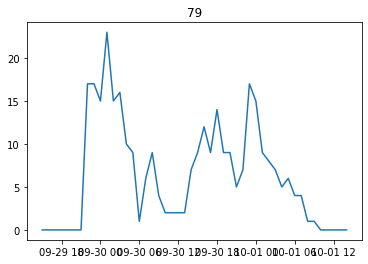

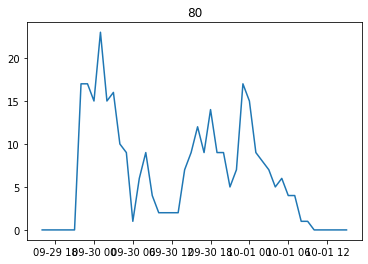

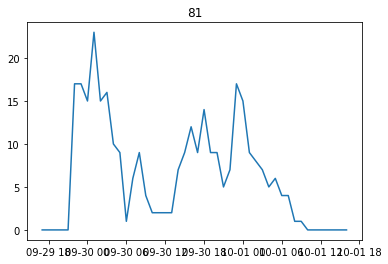

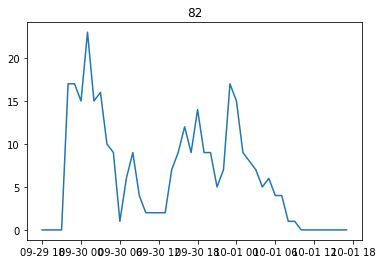

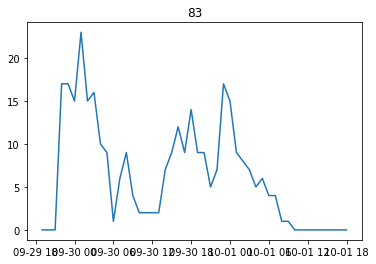

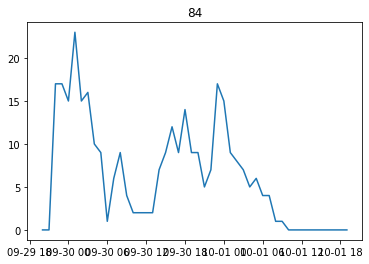

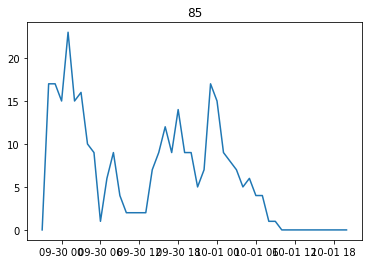

In [25]:
step = 48
'''試圖從雨量累積情況中尋找 斜率較陡之處，以尋找有明顯雨量（降雨）的事件'''
plt.plot(X, Y_cum)
rainfall_event_X = []
rainfall_event_Y = []
for i in range(0, len(Y)):
    if np.sum(Y[i:i+step]>20):
        # print(X[i:i+step])
        if (Y[i] == Y[i+step] == 0):
            rainfall_event_X.append(X[i:i+step])
            rainfall_event_Y.append(Y[i:i+step])
        plt.plot(X[i:i+step], Y_cum[i:i+step], 'r')

rainfall_event_Y = np.array(rainfall_event_Y)
print(rainfall_event_Y)
# for j in range(rainfall_event_Y.shape[0]):
#     plt.plot(rainfall_event_X[j], rainfall_event_Y[j], 'r')
plt.show()

for j in range(rainfall_event_Y.shape[0]):
    if (rainfall_event_Y[j][0] == rainfall_event_Y[j][-1] == 0):
        plt.plot(rainfall_event_X[j], rainfall_event_Y[j])
        plt.title(j)
        plt.show()

In [26]:
'''讀取 白石01_19.csc 降雨資料'''
Bai_Shih_01_19 = pd.read_csv('data/雨量/白石01_19.csv', index_col=0)
Bai_Shih_01_19

,Time,Rainfall_y
0,2001-01-01 00:00:00,0.0
1,2001-01-01 01:00:00,0.0
2,2001-01-01 02:00:00,0.0
3,2001-01-01 03:00:00,0.0
4,2001-01-01 04:00:00,0.0
...,...,...
166571,2019-12-31 19:00:00,6.0
166572,2019-12-31 20:00:00,4.0
166573,2019-12-31 21:00:00,3.0
166574,2019-12-31 22:00:00,4.0


In [27]:
Bai_Shih_01_19['Time'] = pd.to_datetime(Bai_Shih_01_19['Time'])
Bai_Shih_01_19['Year'] = Bai_Shih_01_19['Time'].map(lambda x: x.year)
Bai_Shih_01_19['Month'] = Bai_Shih_01_19['Time'].map(lambda x: x.month)
Bai_Shih_01_19

,Time,Rainfall_y,Year,Month
0,2001-01-01 00:00:00,0.0,2001,1
1,2001-01-01 01:00:00,0.0,2001,1
2,2001-01-01 02:00:00,0.0,2001,1
3,2001-01-01 03:00:00,0.0,2001,1
4,2001-01-01 04:00:00,0.0,2001,1
...,...,...,...,...
166571,2019-12-31 19:00:00,6.0,2019,12
166572,2019-12-31 20:00:00,4.0,2019,12
166573,2019-12-31 21:00:00,3.0,2019,12
166574,2019-12-31 22:00:00,4.0,2019,12


In [28]:
Bai_Shih_01_19 = Bai_Shih_01_19.loc[(Bai_Shih_01_19['Month']>6)&(Bai_Shih_01_19['Month']<=10)]
Bai_Shih_01_19

,Time,Rainfall_y,Year,Month
4346,2001-07-01 00:00:00,0.0,2001,7
4347,2001-07-01 01:00:00,0.0,2001,7
4348,2001-07-01 02:00:00,0.0,2001,7
4349,2001-07-01 03:00:00,0.0,2001,7
4350,2001-07-01 04:00:00,0.0,2001,7
...,...,...,...,...
165107,2019-10-31 19:00:00,0.0,2019,10
165108,2019-10-31 20:00:00,0.0,2019,10
165109,2019-10-31 21:00:00,0.0,2019,10
165110,2019-10-31 22:00:00,0.0,2019,10


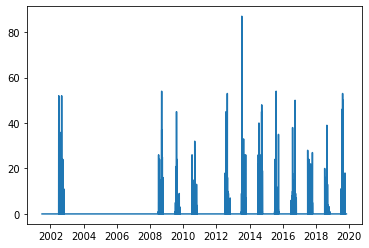

In [29]:
BS_X = Bai_Shih_01_19['Time']
BS_Y = Bai_Shih_01_19['Rainfall_y']
plt.plot(BS_X, BS_Y)
plt.show()

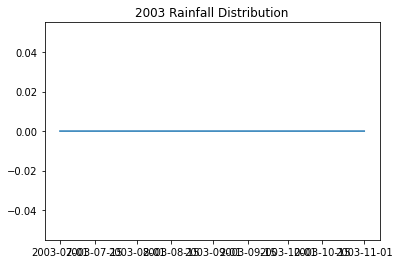

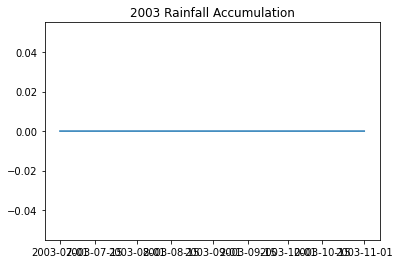

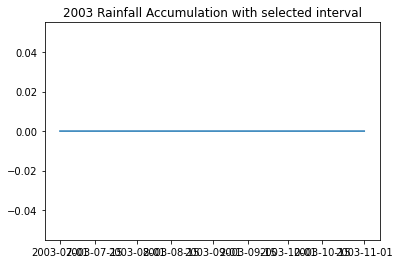

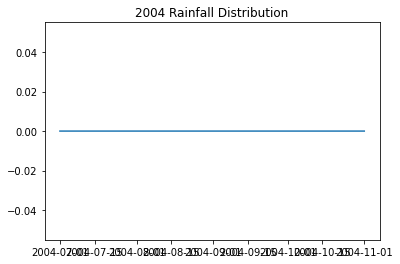

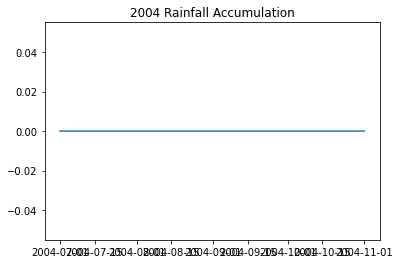

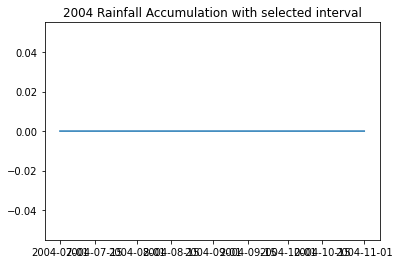

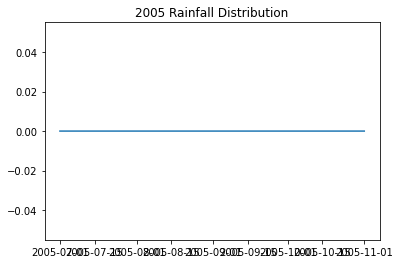

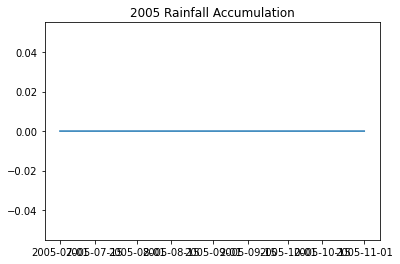

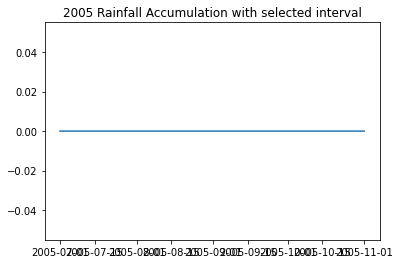

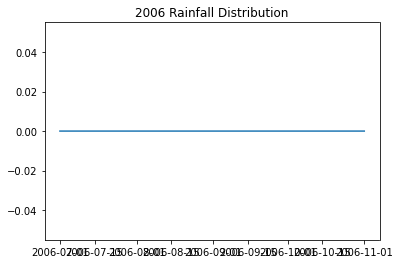

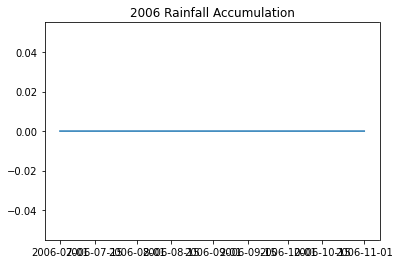

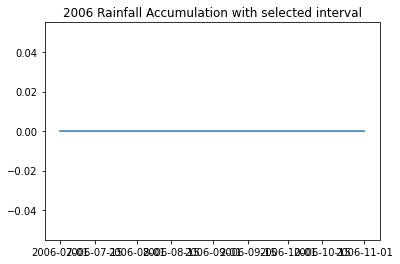

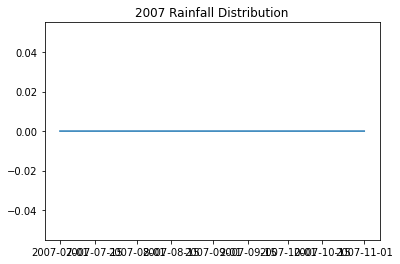

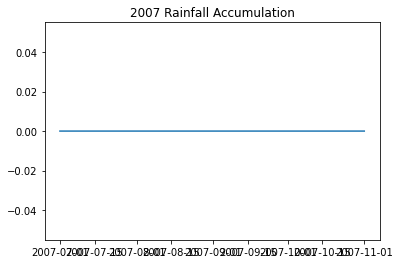

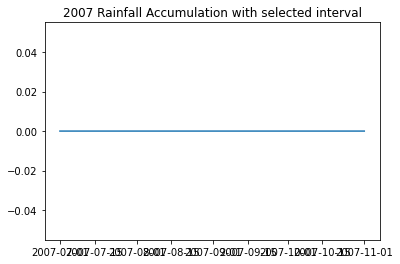

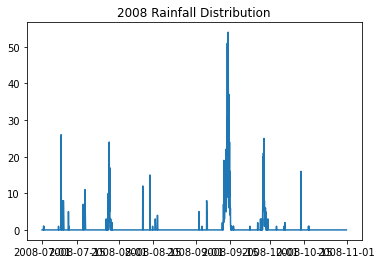

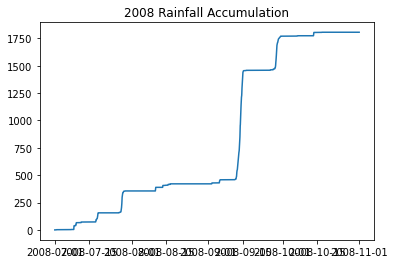

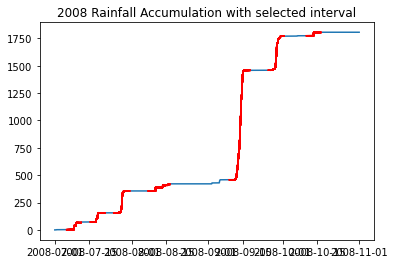

plot_32, peak_location:39


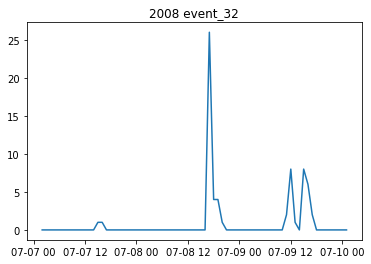

no target file, create a new csv file.
plot_106, peak_location:39


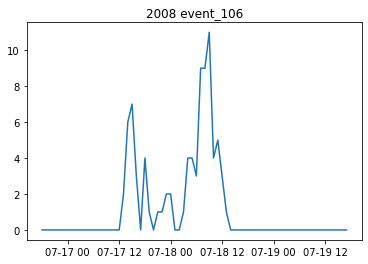

no target file, create a new csv file.
plot_187, peak_location:39


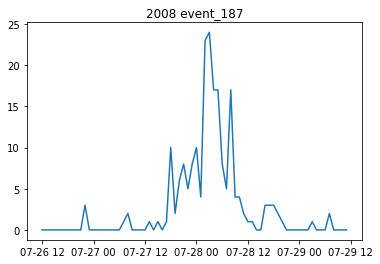

no target file, create a new csv file.
plot_265, peak_location:39


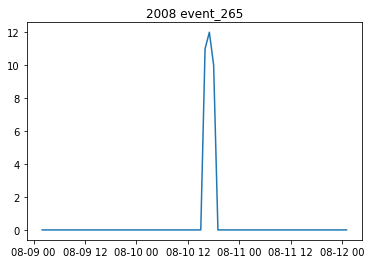

no target file, create a new csv file.
plot_335, peak_location:39


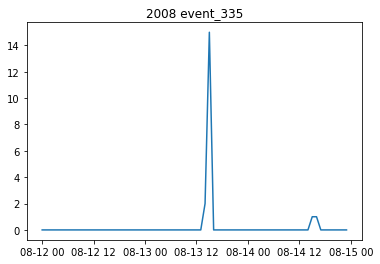

no target file, create a new csv file.
plot_624, peak_location:39


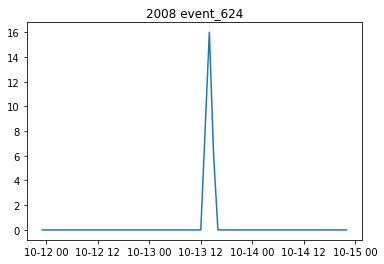

no target file, create a new csv file.


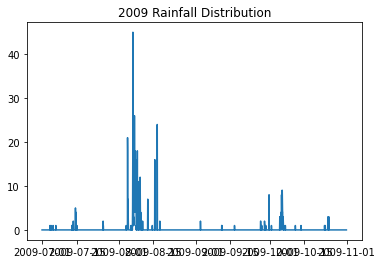

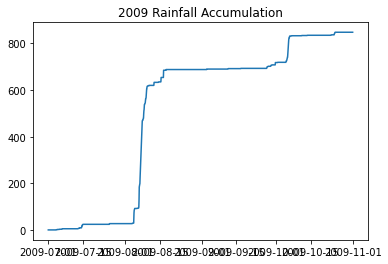

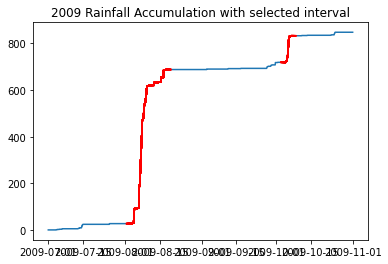

plot_32, peak_location:39


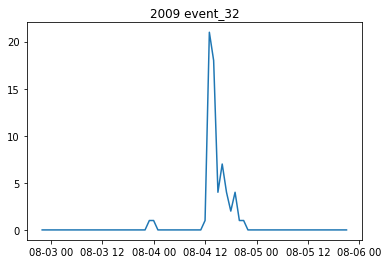

no target file, create a new csv file.
plot_84, peak_location:39


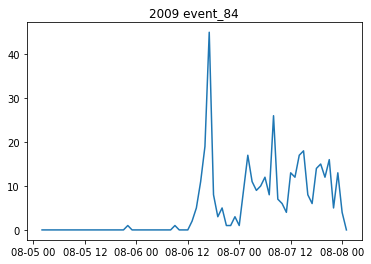

no target file, create a new csv file.
plot_250, peak_location:39


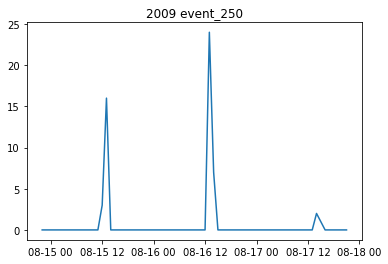

no target file, create a new csv file.
plot_322, peak_location:39


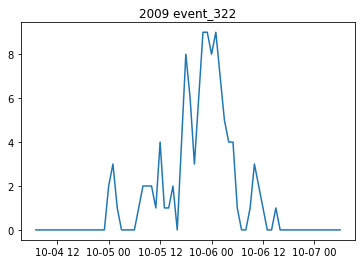

no target file, create a new csv file.


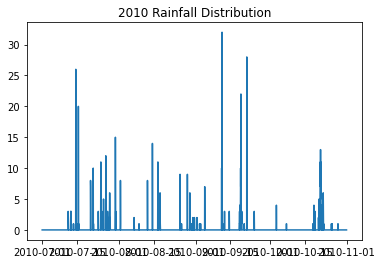

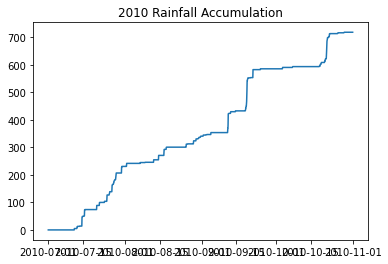

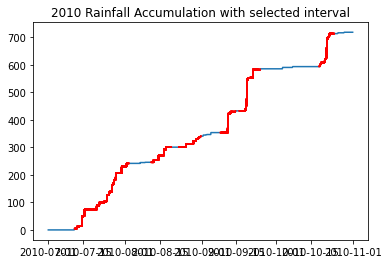

plot_32, peak_location:39


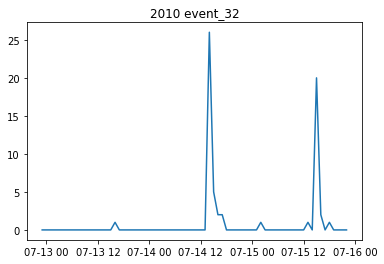

no target file, create a new csv file.
plot_129, peak_location:39


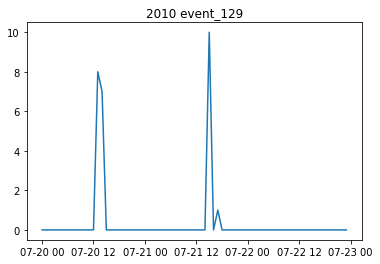

no target file, create a new csv file.
plot_202, peak_location:39


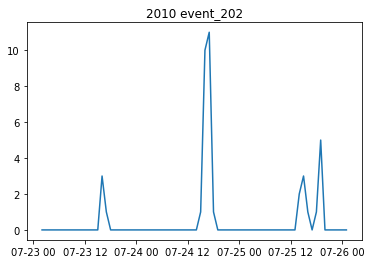

no target file, create a new csv file.
plot_250, peak_location:39


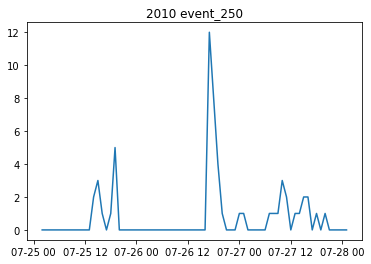

no target file, create a new csv file.
plot_322, peak_location:39


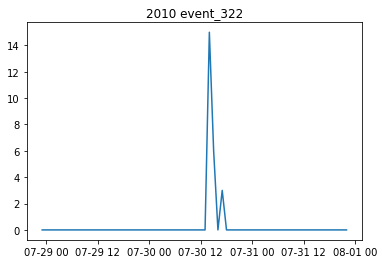

no target file, create a new csv file.
plot_394, peak_location:39


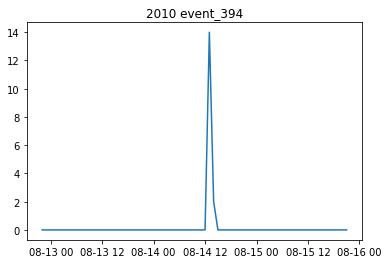

no target file, create a new csv file.
plot_447, peak_location:39


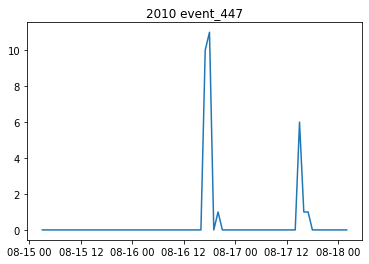

no target file, create a new csv file.
plot_519, peak_location:39


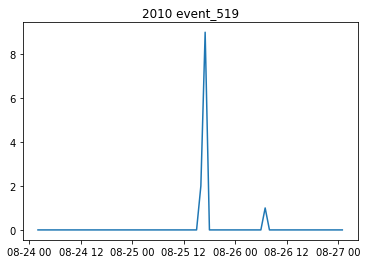

no target file, create a new csv file.
plot_590, peak_location:39


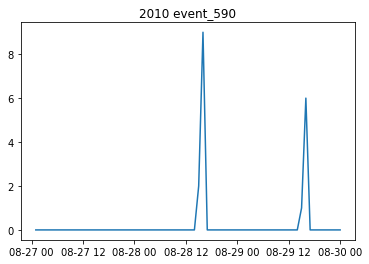

no target file, create a new csv file.
plot_666, peak_location:39


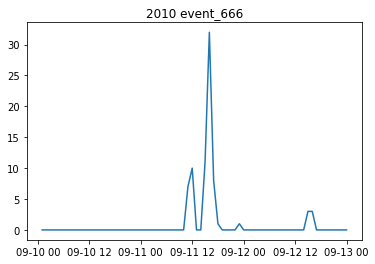

no target file, create a new csv file.
plot_741, peak_location:39


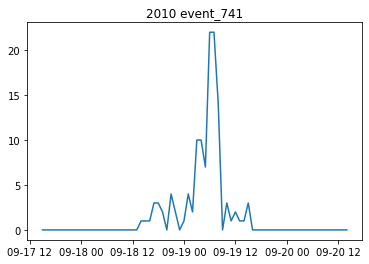

no target file, create a new csv file.
plot_799, peak_location:39


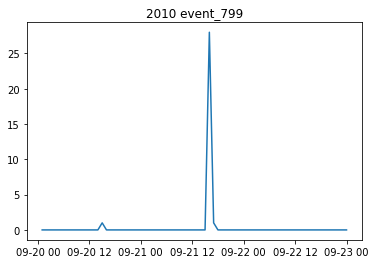

no target file, create a new csv file.
plot_873, peak_location:39


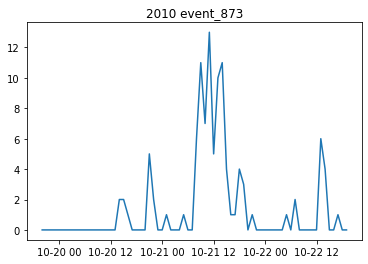

no target file, create a new csv file.


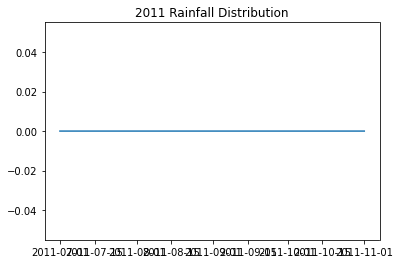

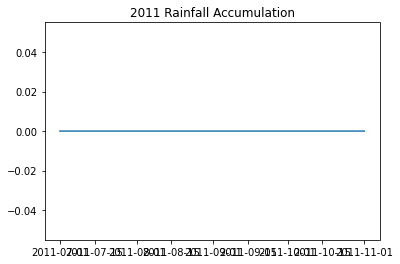

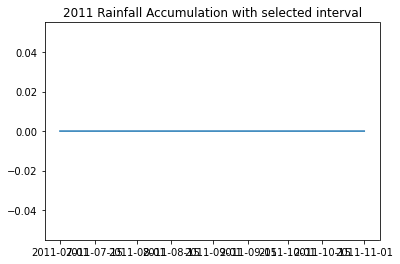

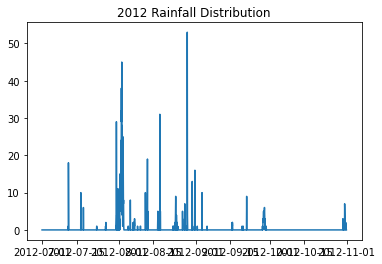

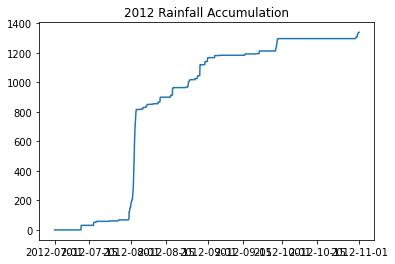

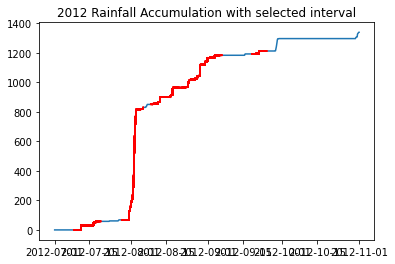

plot_32, peak_location:39


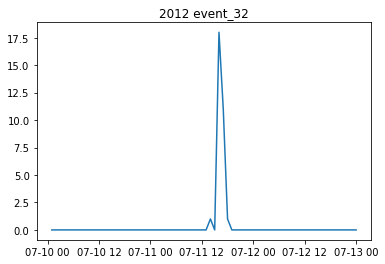

no target file, create a new csv file.
plot_105, peak_location:39


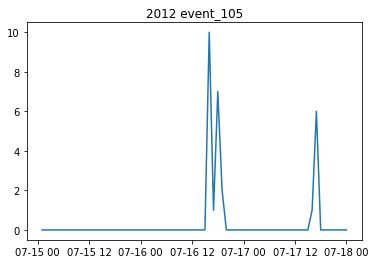

no target file, create a new csv file.
plot_177, peak_location:39


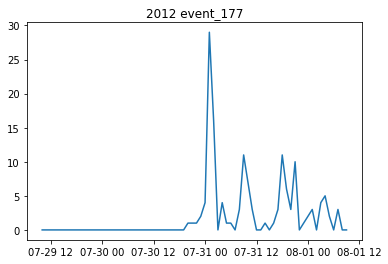

no target file, create a new csv file.
plot_336, peak_location:39


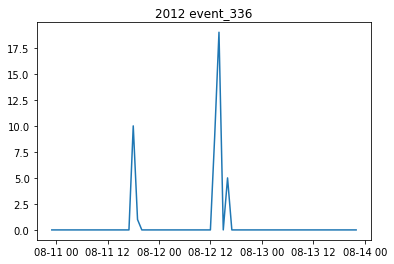

no target file, create a new csv file.
plot_408, peak_location:39


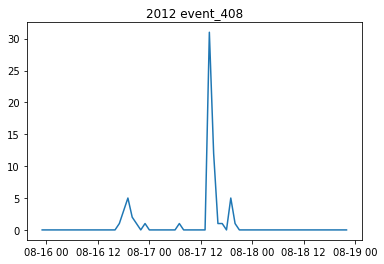

no target file, create a new csv file.
plot_481, peak_location:39


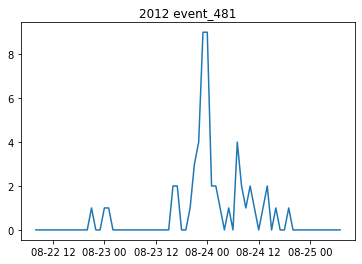

no target file, create a new csv file.
plot_554, peak_location:39


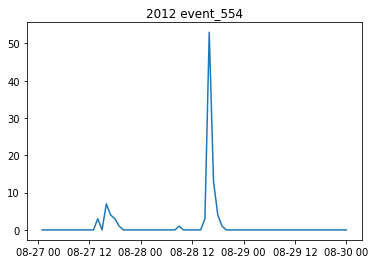

no target file, create a new csv file.
plot_628, peak_location:39


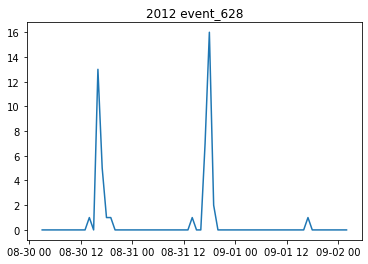

no target file, create a new csv file.
plot_697, peak_location:39


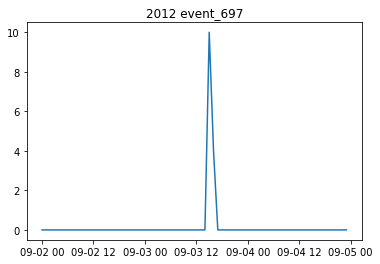

no target file, create a new csv file.
plot_769, peak_location:39


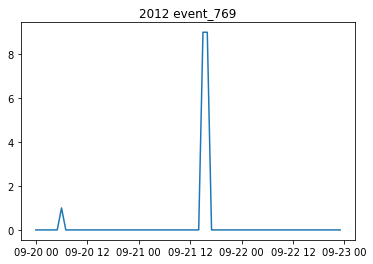

no target file, create a new csv file.


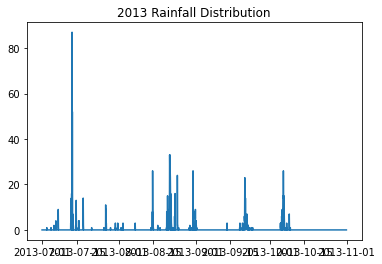

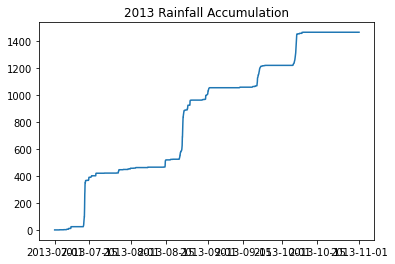

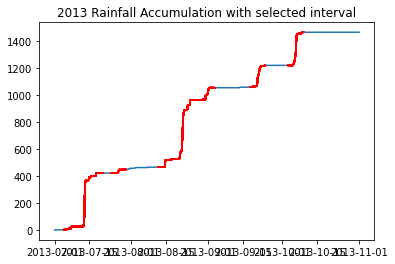

plot_32, peak_location:39


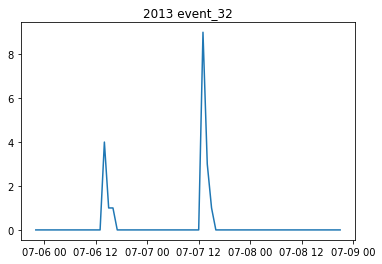

no target file, create a new csv file.
plot_112, peak_location:39


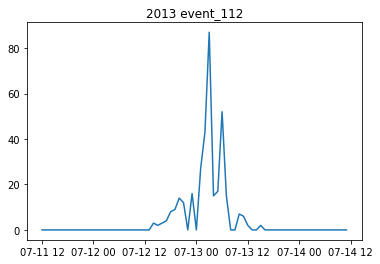

no target file, create a new csv file.
plot_220, peak_location:39


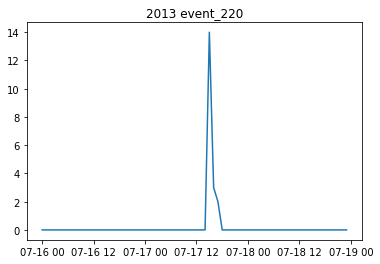

no target file, create a new csv file.
plot_292, peak_location:39


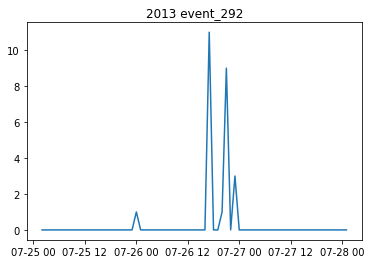

no target file, create a new csv file.
plot_368, peak_location:39


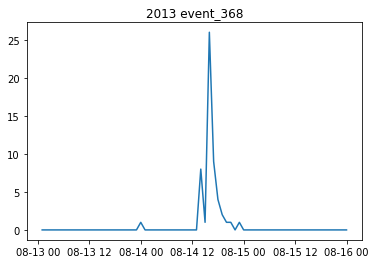

no target file, create a new csv file.
plot_461, peak_location:39


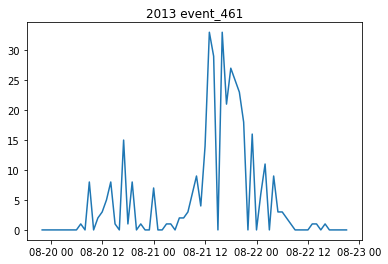

no target file, create a new csv file.
plot_536, peak_location:39


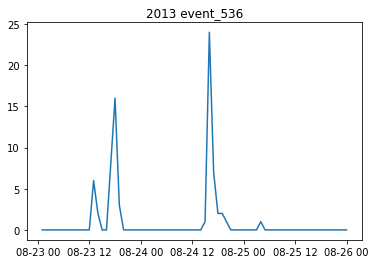

no target file, create a new csv file.
plot_704, peak_location:39


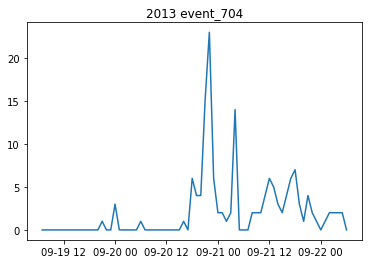

no target file, create a new csv file.


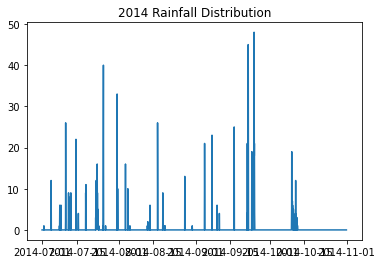

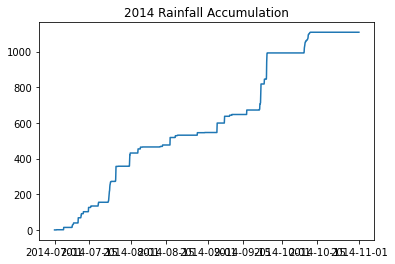

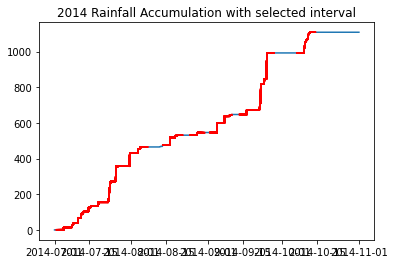

plot_32, peak_location:39


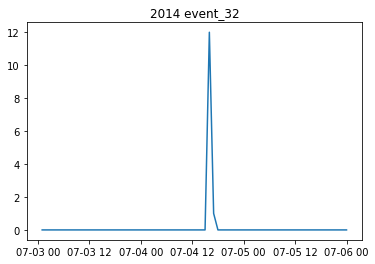

no target file, create a new csv file.
plot_204, peak_location:39


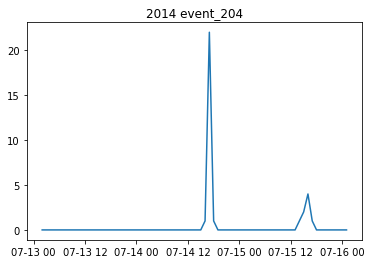

no target file, create a new csv file.
plot_279, peak_location:39


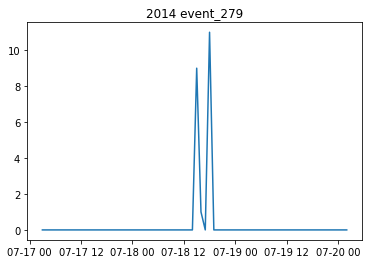

no target file, create a new csv file.
plot_361, peak_location:39


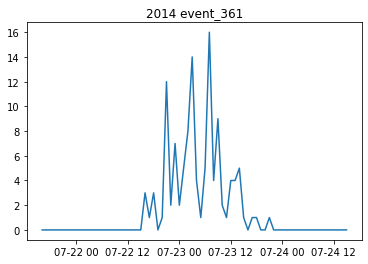

no target file, create a new csv file.
plot_421, peak_location:39


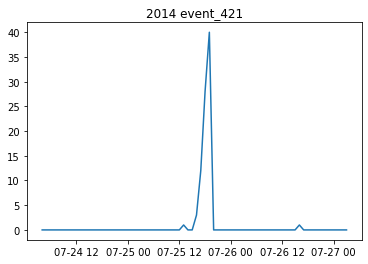

no target file, create a new csv file.
plot_494, peak_location:39


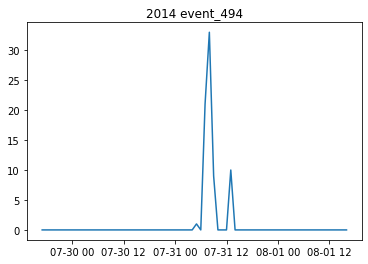

no target file, create a new csv file.
plot_571, peak_location:39


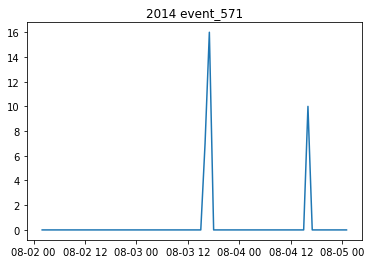

no target file, create a new csv file.
plot_666, peak_location:39


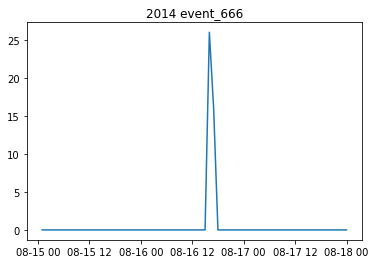

no target file, create a new csv file.
plot_717, peak_location:39


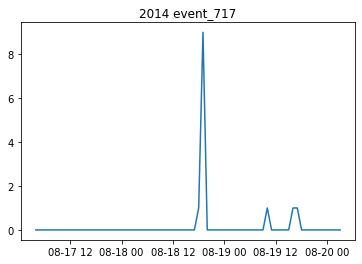

no target file, create a new csv file.
plot_789, peak_location:39


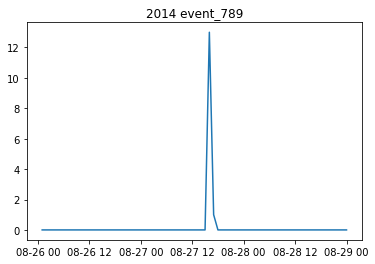

no target file, create a new csv file.
plot_862, peak_location:39


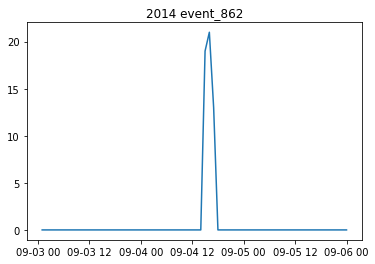

no target file, create a new csv file.
plot_934, peak_location:39


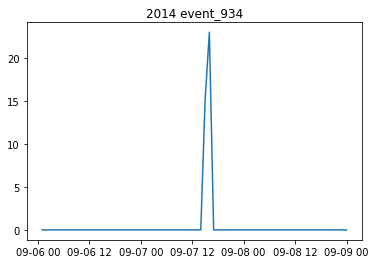

no target file, create a new csv file.
plot_1006, peak_location:39


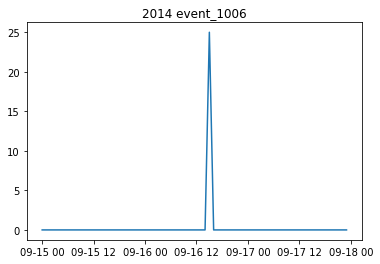

no target file, create a new csv file.
plot_1087, peak_location:39


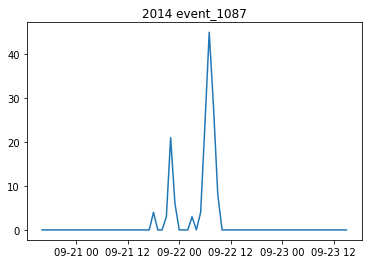

no target file, create a new csv file.
plot_1144, peak_location:39


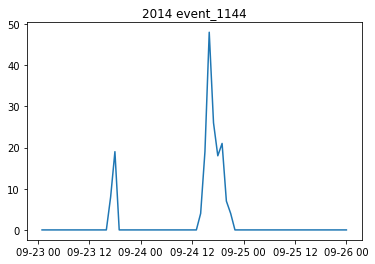

no target file, create a new csv file.


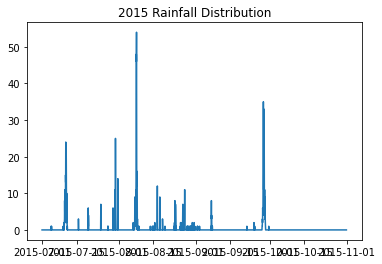

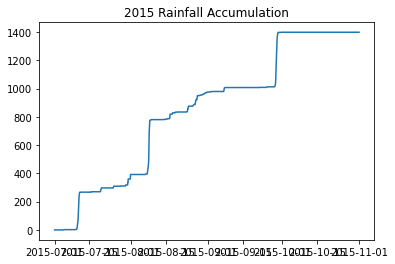

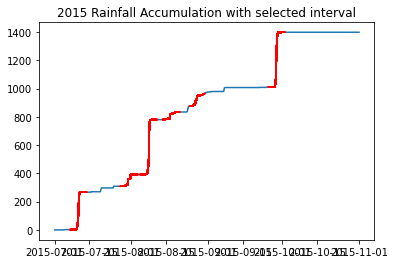

plot_41, peak_location:39


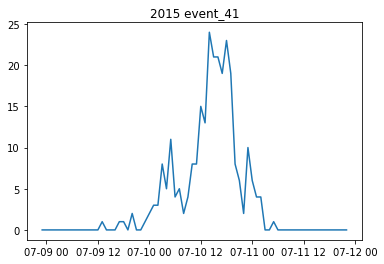

no target file, create a new csv file.
plot_126, peak_location:39


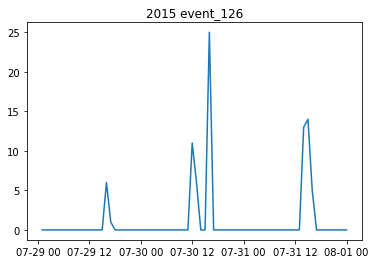

no target file, create a new csv file.
plot_237, peak_location:39


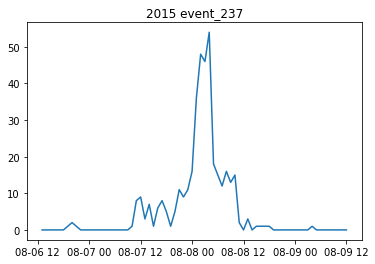

no target file, create a new csv file.
plot_316, peak_location:39


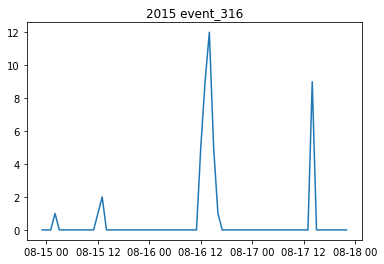

no target file, create a new csv file.
plot_488, peak_location:39


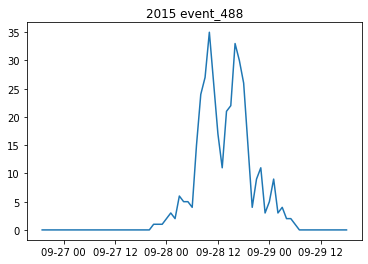

no target file, create a new csv file.


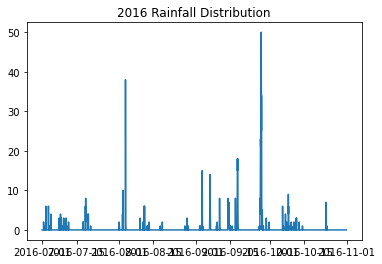

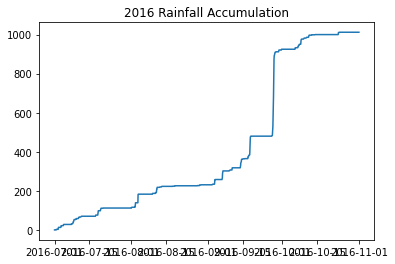

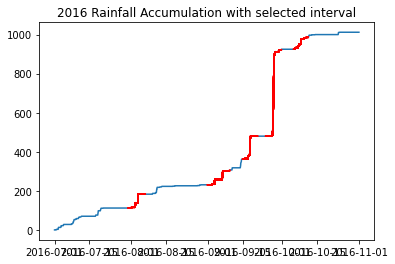

plot_57, peak_location:39


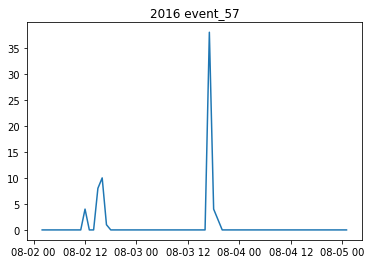

no target file, create a new csv file.
plot_129, peak_location:39


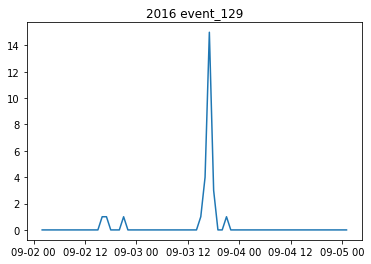

no target file, create a new csv file.
plot_201, peak_location:39


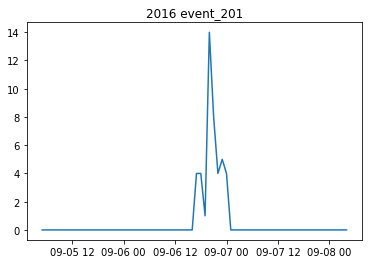

no target file, create a new csv file.
plot_273, peak_location:39


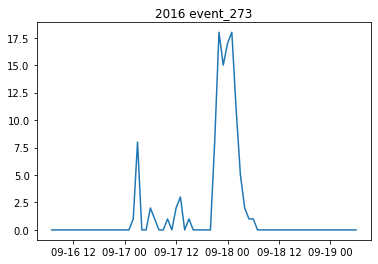

no target file, create a new csv file.
plot_357, peak_location:39


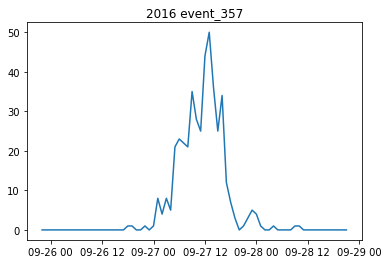

no target file, create a new csv file.
plot_433, peak_location:39


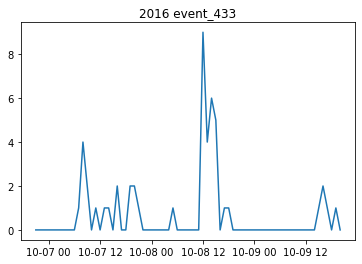

no target file, create a new csv file.


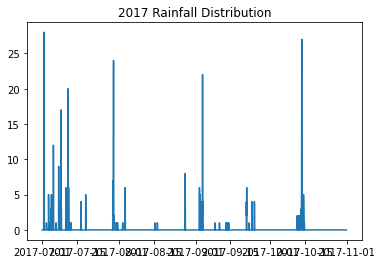

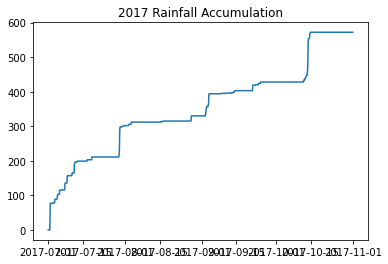

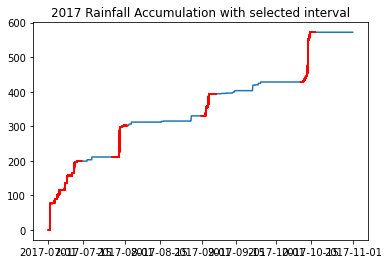

plot_51, peak_location:39


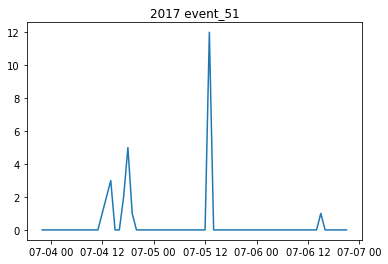

no target file, create a new csv file.
plot_124, peak_location:39


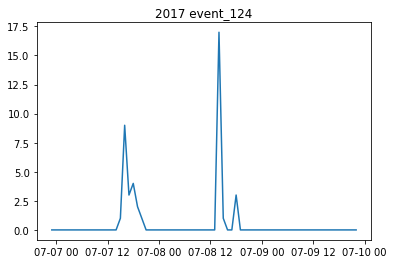

no target file, create a new csv file.
plot_194, peak_location:39


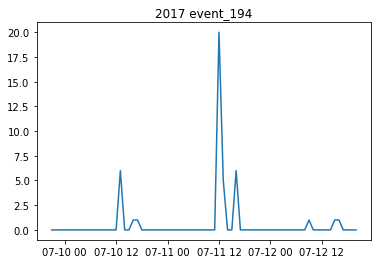

no target file, create a new csv file.
plot_268, peak_location:39


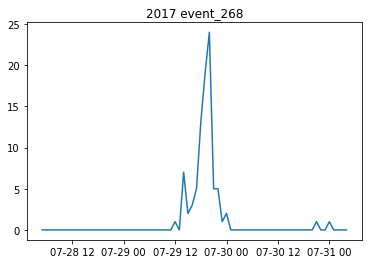

no target file, create a new csv file.
plot_340, peak_location:39


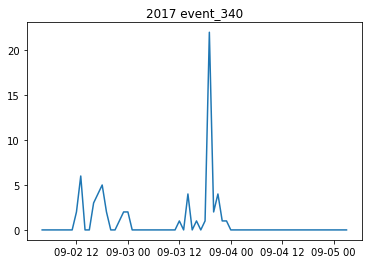

no target file, create a new csv file.
plot_414, peak_location:39


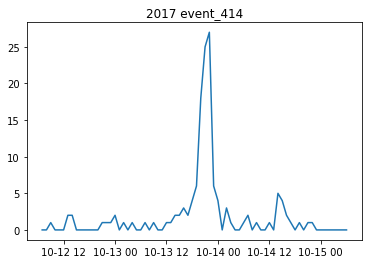

no target file, create a new csv file.


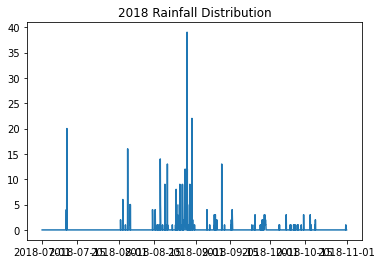

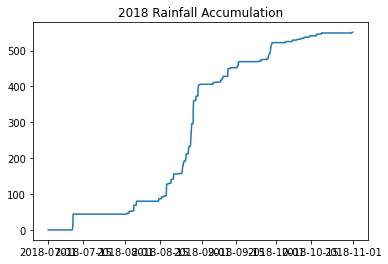

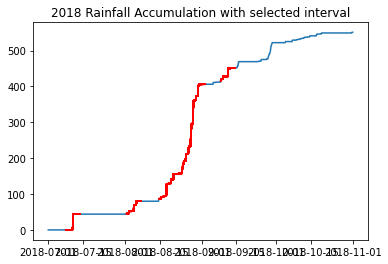

plot_33, peak_location:39


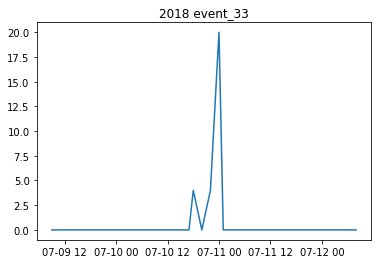

no target file, create a new csv file.
plot_105, peak_location:39


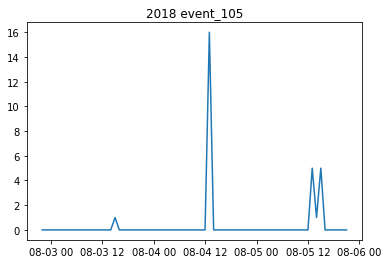

no target file, create a new csv file.
plot_177, peak_location:39


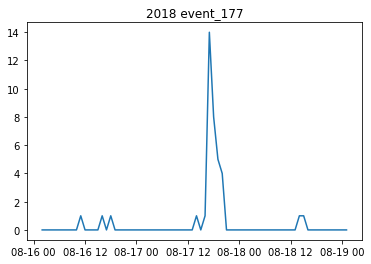

no target file, create a new csv file.
plot_246, peak_location:39


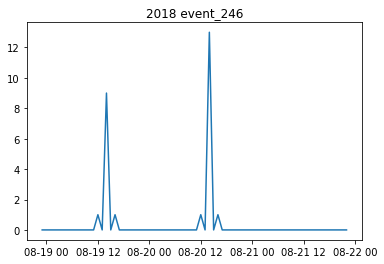

no target file, create a new csv file.
plot_507, peak_location:39


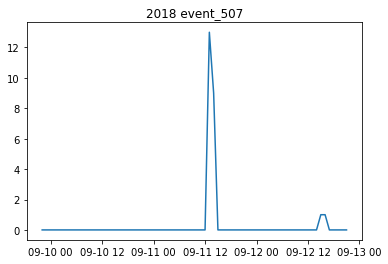

no target file, create a new csv file.


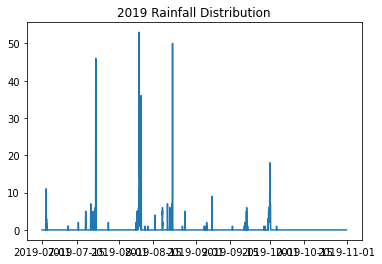

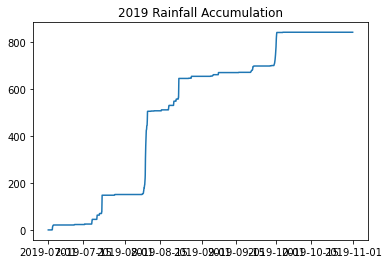

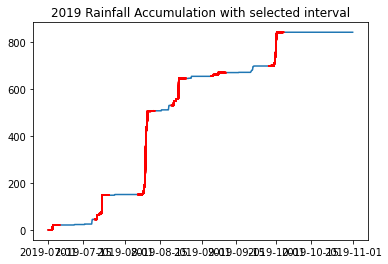

plot_1, peak_location:39


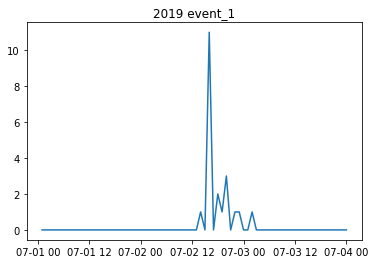

no target file, create a new csv file.
plot_74, peak_location:39


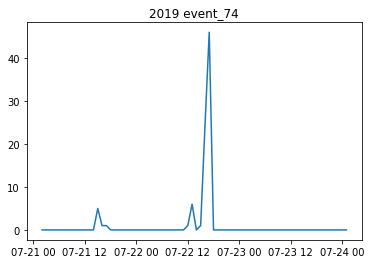

no target file, create a new csv file.
plot_149, peak_location:39


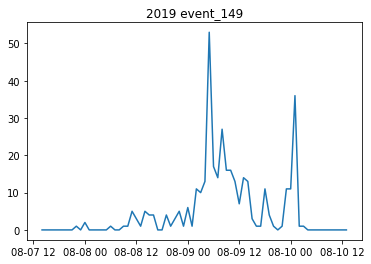

no target file, create a new csv file.
plot_242, peak_location:39


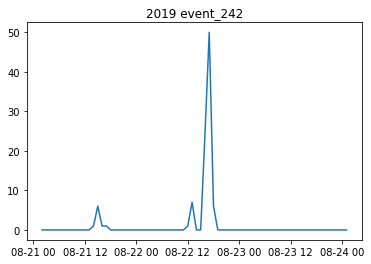

no target file, create a new csv file.
plot_314, peak_location:39


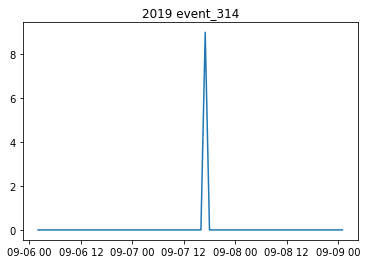

no target file, create a new csv file.
plot_387, peak_location:39


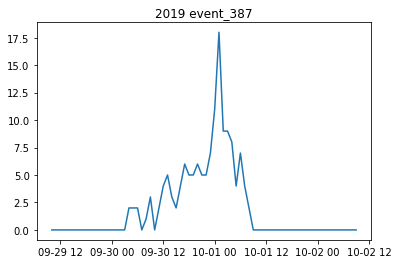

no target file, create a new csv file.


In [36]:
'''依照年份 擷取 白石雨量事件'''
# TARGET_YEAR = 2015
for TARGET_YEAR in range(2003, 2020):
    '''首先讀取目標年份'''
    filter = (Bai_Shih_01_19["Year"] == TARGET_YEAR)
    # filter = (Bai_Shih_01_19["Month"] == 7)
    Bai_Shih_dataframe_of_specified_year = Bai_Shih_01_19[filter]
    Bai_Shih_dataframe_of_specified_year
    BSdosy_X = Bai_Shih_dataframe_of_specified_year['Time']
    BSdosy_Y = Bai_Shih_dataframe_of_specified_year['Rainfall_y']
    plt.title(str(TARGET_YEAR)+' Rainfall Distribution')
    plt.plot(BSdosy_X, BSdosy_Y)
    plt.show()


    '''觀察雨量累積情況，以便從中挑選不同程度之降雨事件'''

    BSdosy_Y_cum = np.cumsum(BSdosy_Y)
    plt.title(str(TARGET_YEAR)+' Rainfall Accumulation')
    plt.plot(BSdosy_X, BSdosy_Y_cum)
    plt.show()

    step = 72
    '''試圖從雨量累積情況中尋找 斜率較陡之處，以尋找有明顯雨量（降雨）的事件'''
    plt.plot(BSdosy_X, BSdosy_Y_cum)
    rainfall_event_X = []
    rainfall_event_Y = []
    for i in range(len(BSdosy_Y)):
        if np.sum(BSdosy_Y[i:i+step]>8):
            # print(X[i:i+step])
            # if (BSdosy_Y[i] == BSdosy_Y[i+step] == 0):
            rainfall_event_X.append(BSdosy_X[i:i+step])
            rainfall_event_Y.append(BSdosy_Y[i:i+step])
            plt.plot(BSdosy_X[i:i+step], BSdosy_Y_cum[i:i+step], 'r')

    rainfall_event_Y = np.array(rainfall_event_Y)
    # for j in range(rainfall_event_Y.shape[0]):
    #     plt.plot(rainfall_event_X[j], rainfall_event_Y[j], 'r')
    plt.title(str(TARGET_YEAR)+' Rainfall Accumulation with selected interval')
    plt.show()

    for j in range(rainfall_event_Y.shape[0]):
        # if (rainfall_event_Y[j][0] == rainfall_event_Y[j][-1] == 0):
        peak_index = np.argmax(rainfall_event_Y[j])
        if (peak_index - step/2 == 3) & (rainfall_event_Y[j][0] == rainfall_event_Y[j][-1] <= 1):
        # if abs(peak_index - step/2) < 1:
            print(f'plot_{j}, peak_location:{peak_index}')
            plt.plot(rainfall_event_X[j], rainfall_event_Y[j])
            plt.title(str(TARGET_YEAR)+' event_'+str(j))
            plt.show()
            data = {'Time': rainfall_event_X[j],
            'Rainfall': rainfall_event_Y[j]}
            event_df = pd.DataFrame(data)
            if os.path.isdir('data/event/Bai_Shih/July_October_s72_p_m3/'+str(TARGET_YEAR)) == 0:
                os.mkdir('data/event/Bai_Shih/July_October_s72_p_m3/'+str(TARGET_YEAR))
            else:
                pass
            if os.path.isfile('data/event/Bai_Shih/July_October_s72_p_m3/'+str(TARGET_YEAR)+'/event'+str(j)+'.csv') == True:
                pass
            else:
                event_df.to_csv('data/event/Bai_Shih/July_October_s72_p_m3/'+str(TARGET_YEAR)+'/event'+str(j)+'.csv',
                            index=False)
                print(f'no target file, create a new csv file.')

In [37]:
test_path = 'data/event/Bai_Shih/July_October_s72_p_m3/2008'
l_i_s_t = os.listdir(test_path)
l_i_s_t

['event106.csv',
 'event187.csv',
 'event265.csv',
 'event32.csv',
 'event335.csv',
 'event624.csv']

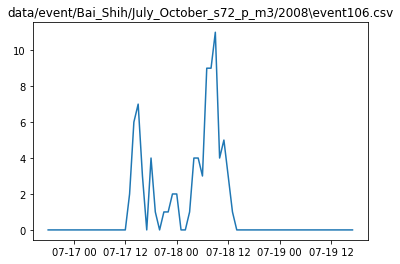

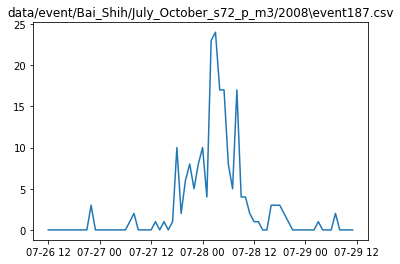

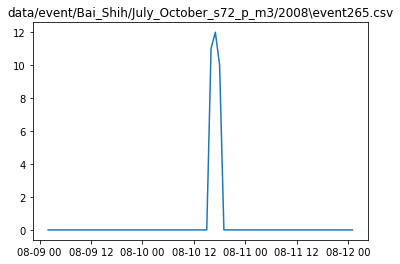

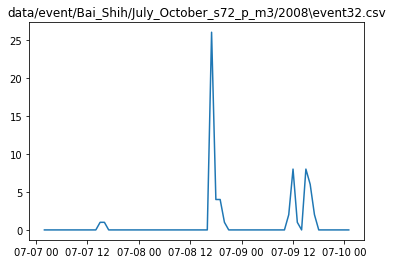

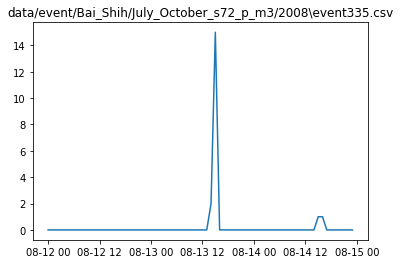

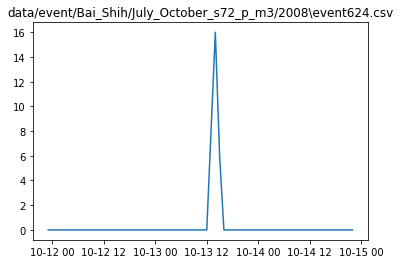

In [38]:
'''測試檔案儲存是否正常'''
for i in range(len(l_i_s_t)):
    ttgt = pd.read_csv(os.path.join(test_path, l_i_s_t[i]))
    ttgt['Time'] = pd.to_datetime(ttgt['Time'])
    X = ttgt['Time']
    Y = ttgt['Rainfall']
    plt.title(os.path.join(test_path, l_i_s_t[i]))
    plt.plot(X, Y)
    plt.show()

---
### 另一種訓練資料，選取雨量成長的部分